In [17]:
!pip install fastapi uvicorn nest_asyncio transformers torch pyngrok

In [22]:
from fastapi import FastAPI, HTTPException
from transformers import pipeline
import nest_asyncio
from pyngrok import ngrok, conf
import uvicorn

In [24]:
import nest_asyncio
from pyngrok import ngrok, conf

NGROK_TOKEN = '2jEwvUjyqoJpMo8U1ejUMaf27Gz_6FXVhxgatPKjYS7WWYpsg'

conf.get_default().auth_token = NGROK_TOKEN
ngrok.kill()
ngrok_tunell = ngrok.connect(8000)

print('Este es el URL,',ngrok_tunell.public_url)

nest_asyncio.apply()
app = FastAPI()

Este es el URL, https://369e-34-83-190-199.ngrok-free.app


In [ ]:
# Cargar los modelos preentrenados
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
text_generator = pipeline("text-generation", model="gpt2")

@app.get("/")
def read_root():
    return {"message": "Bienvenido a la aplicación de IA para resumir reuniones y generar contenido"}

@app.get("/resumir")
def resumir_reunion(transcript: str):
    try:
        summary = summarizer(transcript, max_length=150, min_length=30, do_sample=False)
        return {"summary": summary[0]['summary_text']}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

@app.get("/generar_contenido")
def generar_contenido(topic: str):
    try:
        content = text_generator(topic, max_length=500)
        return {"content": content[0]['generated_text']}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Exponer el servidor a la web usando ngrok
public_url = ngrok.connect(8000)
print("Public URL:", public_url)

# Ejecutar la aplicación
uvicorn.run(app, host="0.0.0.0", port=8000)

Public URL: NgrokTunnel: "https://f204-34-83-190-199.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [353]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     171.5.12.122:0 - "GET / HTTP/1.1" 200 OK
INFO:     171.5.12.122:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     171.5.12.122:0 - "GET /resumir HTTP/1.1" 422 Unprocessable Entity
INFO:     171.5.12.122:0 - "GET /resumir?transcript=Buenos+d%C3%ADas+a+todos.+Vamos+a+comenzar+nuestra+reuni%C3%B3n+semanal+de+actualizaci%C3%B3n+de+proyectos.+Primero%2C+me+gustar%C3%ADa+que+cada+equipo+nos+diera+un+breve+resumen+del+progreso+que+han+hecho+esta+semana.+Empecemos+con+el+equipo+de+desarrollo.+Equipo+de+desarrollo%3A+Esta+semana+hemos+completado+la+implementaci%C3%B3n+de+la+nueva+funcionalidad+de+b%C3%BAsqueda+avanzada+en+nuestra+aplicaci%C3%B3n.+Hemos+realizado+pruebas+iniciales+y+los+resultados+han+sido+positivos.+A%C3%BAn+nos+quedan+algunas+pruebas+de+integraci%C3%B3n+por+hacer%2C+pero+esperamos+tener+todo+listo+para+el+final+de+la+semana.+Equipo+de+marketing%3A+En+marketing%2C+hemos+lanzado+la+campa%C3%B1a+publicitaria+en+redes+sociales+y+ya+estamos+viendo+un+aumento+en+el+t

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


INFO:     171.5.12.122:0 - "GET /generar_contenido?topic=Explica+como+crear+una+pagina+web+en+internet HTTP/1.1" 200 OK


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


INFO:     171.5.12.122:0 - "GET /generar_contenido?topic=explain+how+to+create+a+website HTTP/1.1" 200 OK


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


INFO:     171.5.12.122:0 - "GET /generar_contenido?topic=artificial+intelligence+in+healthcare HTTP/1.1" 200 OK


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


INFO:     171.5.12.122:0 - "GET /generar_contenido?topic=artificial+intelligence+in+education HTTP/1.1" 200 OK


# Ejemplo: RESUMIR

Buenos días a todos. Vamos a comenzar nuestra reunión semanal de actualización de proyectos. Primero, me gustaría que cada equipo nos diera un breve resumen del progreso que han hecho esta semana. Empecemos con el equipo de desarrollo.

Equipo de desarrollo: Esta semana hemos completado la implementación de la nueva funcionalidad de búsqueda avanzada en nuestra aplicación. Hemos realizado pruebas iniciales y los resultados han sido positivos. Aún nos quedan algunas pruebas de integración por hacer, pero esperamos tener todo listo para el final de la semana.

Equipo de marketing: En marketing, hemos lanzado la campaña publicitaria en redes sociales y ya estamos viendo un aumento en el tráfico hacia nuestra web. Además, estamos trabajando en una nueva estrategia de contenido para nuestro blog que esperamos lanzar el próximo mes.

Equipo de ventas: En ventas, hemos logrado cerrar tres nuevos contratos esta semana, lo cual es un gran logro para el equipo. También estamos en conversaciones avanzadas con dos posibles clientes más, y esperamos tener noticias positivas pronto.

Director: Excelente trabajo, equipo. Me alegra escuchar todas estas buenas noticias. Ahora, me gustaría discutir algunos de los retos que hemos enfrentado. ¿Hay algún obstáculo que algún equipo esté experimentando y que debamos abordar?

Equipo de desarrollo: Sí, hemos tenido algunos problemas con la integración de la API de búsqueda avanzada con el backend. Estamos trabajando en ello, pero podría retrasar un poco nuestro cronograma.

Director: Entiendo. Por favor, manténganme informado sobre este tema. Si necesitan ayuda adicional, no duden en pedirlo. Ahora, vamos a pasar a los próximos pasos y asignar tareas para la próxima semana. ¿Alguien tiene algo más que agregar antes de cerrar la reunión?

Equipo de marketing: Solo quería mencionar que estamos planeando una reunión adicional para discutir la estrategia de contenido en detalle. Enviaremos una invitación pronto.

Director: Perfecto. Gracias a todos por su tiempo y esfuerzo. Nos vemos la próxima semana.

{"summary":"Esta semana hemos completado la implementación of la nueva funcionalidad de búsqueda avanzada en nuestra aplicación. Hemos realizado pruebas iniciales y los resultados han sido positivos. En ventas, hemos logrado cerrar tres nuevos contratos."}

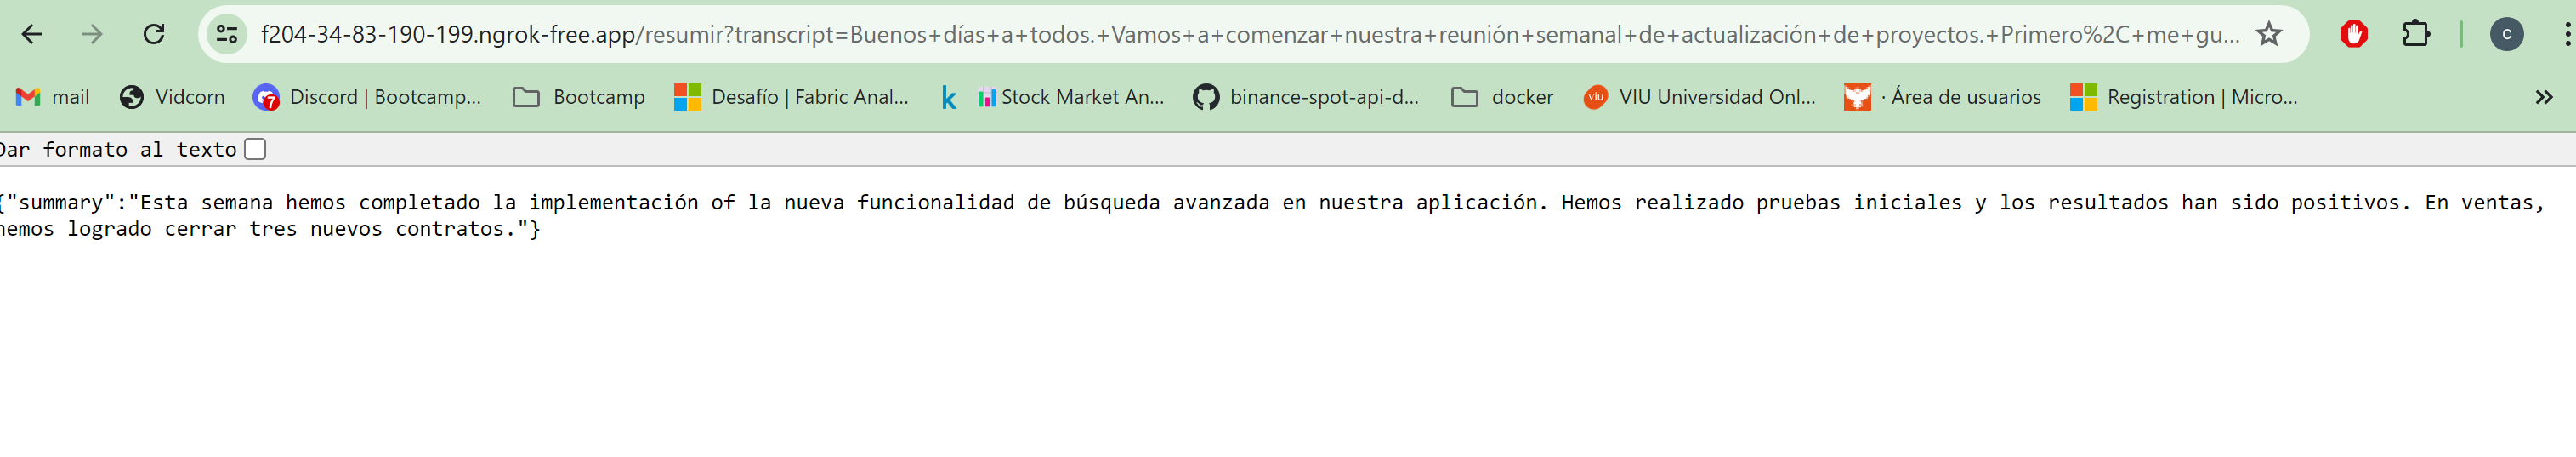

# Ejemplo: GENERAR CONTENIDO

topic=artificial+intelligence+in+education

{"content":"artificial intelligence in education, as its own creation, does not necessarily fit with any human society, although a similar fact holds for the development of artificial intelligence.\" The same holds for \"scientific\" or \"technical\" psychology, which, at the same time, is a science, but which, at the same time, would be a theory.\n\n4: The development of knowledge and theory within this sphere would make it necessary for science to have its most effective effect, that is, \"do a little bit of science and it will spread to the other spheres.\"\n\n5: Thus, no matter how far the progress of science or the development of new means of intelligence, or how much further it progress, a sphere of action in the intellectual sphere will always remain limited.\n\n6: The development of science can, in fact, be understood in the same way that science is seen in the intellectual sphere. The development of knowledge and theory within this sphere would not be possible, for, despite having developed such knowledge and theory in all spheres to the last, it could not even be a development in science for some such sphere at present. This, too, lies in the fact that while knowledge and theory are \"pure,\" and therefore of value and action by no means a necessary part of knowledge or an instrument for the development of knowledge, each one of them must be considered as pure when it is applied to human affairs and, furthermore, as such is not an object of the investigation or training of men. Knowledge and theory are still a kind of scientific activity.\n\n7: This is the difference between the development of science of the past time or the development of science of today, as well as the evolution of knowledge about the modern epoch, viz., a very different idea of what it is right and what we mean by \"recreationism\" as an expression of modern science. In one way or another, what, in the end, is \"true\" for the present human society lies in the development of science of the past time, as well as in the development of theories of the present. We were told, for example, by the British scientist William Davies, in his \"Introduction\" to that book by the author of the new works on history, that knowledge from the beginnings of science and the development of theory can best be considered the development of the great sciences, and that a certain amount of science is thus \"reconstructed like the old world.\"\n\n"}

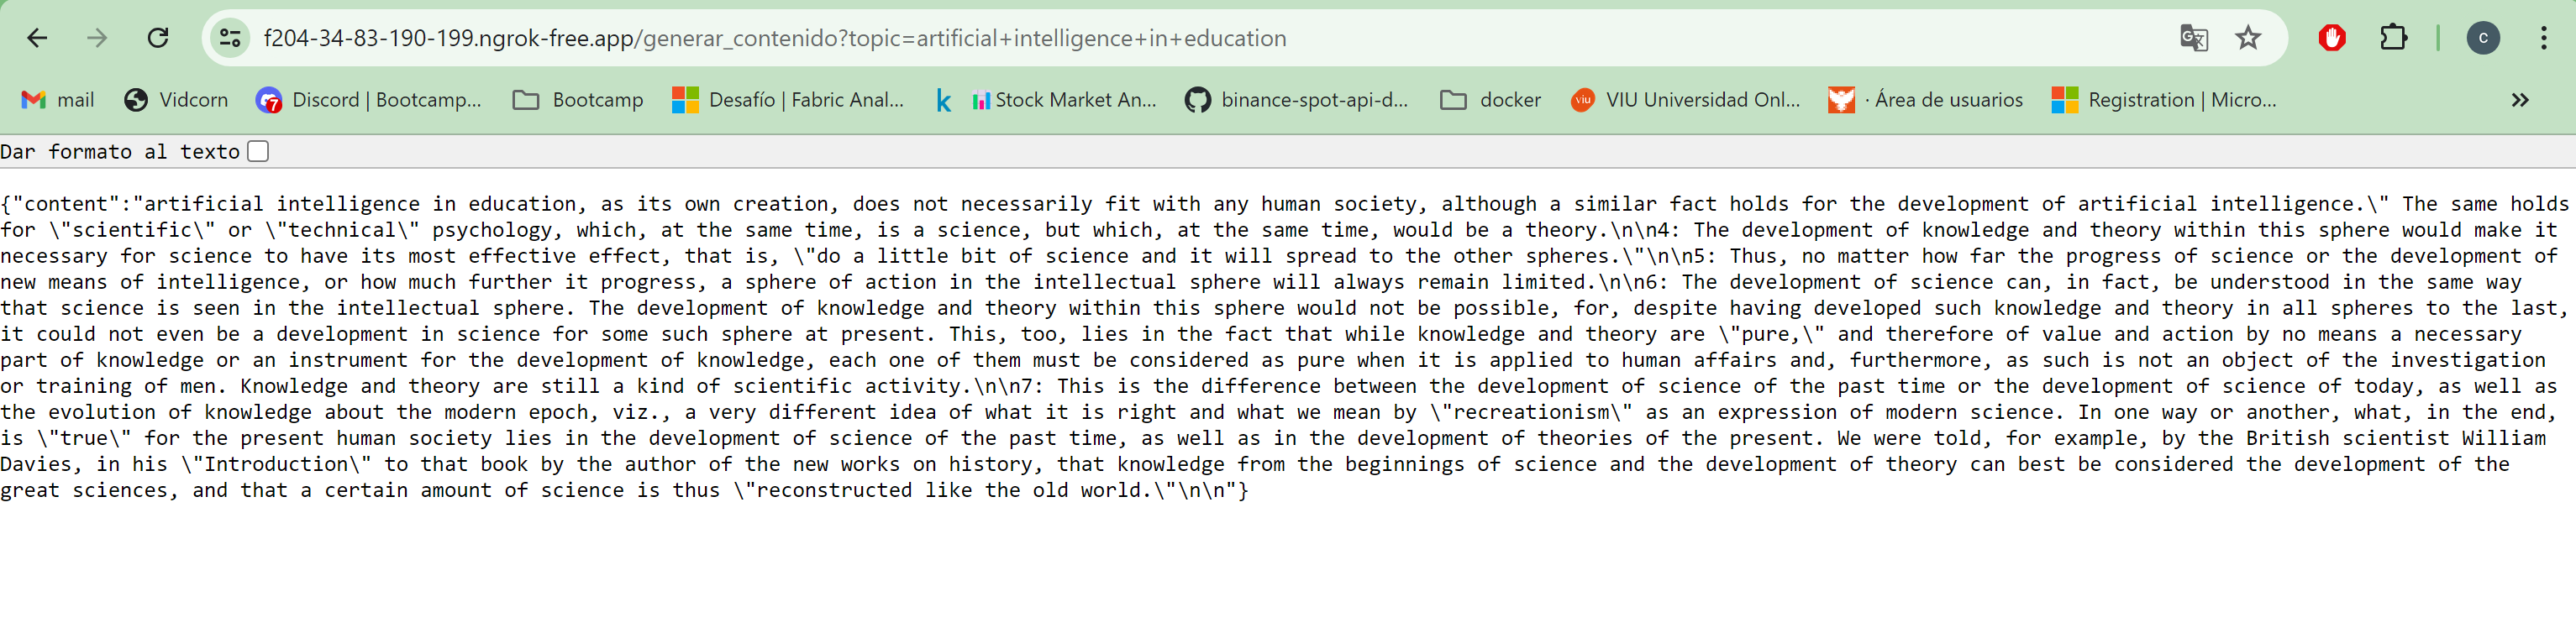